In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [20]:
# Load and Resahpe the data
# def load_data_from_folder(folder_path):
#     data = []
#     for filename in os.listdir(folder_path):
#         filepath = os.path.join(folder_path, filename)
#         with open(filepath, 'r') as file:
#             snapshot = []
#             for line in file:
#                 snapshot.append([float(x) for x in line.strip().split()])
#             data.append(snapshot)
#     return np.array(data)

def load_data_from_folder(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_excel(filepath)
        data.append(df.values)
    return np.array(data)

# Load data from folders
stable_data = load_data_from_folder("/content/drive/MyDrive/codes-backup/lstm-engines/stable")
unstable_data = load_data_from_folder("/content/drive/MyDrive/codes-backup/lstm-engines/unstable")

# Label data
X_stable = stable_data.reshape((-1, 400, 11))
X_unstable = unstable_data.reshape((-1, 400, 11))
y_stable = np.ones(len(X_stable))
y_unstable = np.zeros(len(X_unstable))

# Split data into training and test sets
X_stable_train, X_stable_test, y_stable_train, y_stable_test = train_test_split(X_stable, y_stable, test_size=0.2, random_state=42)
X_unstable_train, X_unstable_test, y_unstable_train, y_unstable_test = train_test_split(X_unstable, y_unstable, test_size=0.2, random_state=42)

# Combine sets
X_train = np.concatenate((X_stable_train, X_unstable_train), axis=0)
y_train = np.concatenate((y_stable_train, y_unstable_train), axis=0)
X_test = np.concatenate((X_stable_test, X_unstable_test), axis=0)
y_test = np.concatenate((y_stable_test, y_unstable_test), axis=0)



In [21]:
# Show shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Display first row of each
print("\nFirst row of X_train:")
print(X_train[0])
print("\nFirst row of y_train:")
print(y_train[0])
print("\nFirst row of X_test:")
print(X_test[0])
print("\nFirst row of y_test:")
print(y_test[0])

Shape of X_train: (307, 400, 11)
Shape of y_train: (307,)
Shape of X_test: (78, 400, 11)
Shape of y_test: (78,)

First row of X_train:
[[ 1.49189636e-02 -4.40503326e+01  3.22692248e-02 ...  1.34780067e+01
   2.10581526e+01 -3.91891228e+01]
 [ 2.14794600e-01 -4.40098261e+01 -1.00340095e-01 ...  1.35506297e+01
   2.09299235e+01 -3.90700863e+01]
 [ 3.09295162e-01 -4.40175699e+01  5.09635550e-02 ...  1.33573604e+01
   2.09622439e+01 -3.91530535e+01]
 ...
 [ 3.97327635e+01 -4.84181863e+01 -4.88079815e-02 ...  1.46634717e+01
   3.00087661e+01 -3.86670173e+01]
 [ 3.99574408e+01 -4.79561308e+01 -6.21539430e-02 ...  1.53194396e+01
   3.15957753e+01 -3.81329741e+01]
 [ 3.99508136e+01 -4.74167229e+01 -4.41073559e-02 ...  1.57285750e+01
   3.31107040e+01 -3.78649893e+01]]

First row of y_train:
1.0

First row of X_test:
[[ 9.28278149e-02 -4.41126358e+01 -6.28418539e-02 ...  1.35235995e+01
   2.09386585e+01 -3.90589070e+01]
 [ 2.92364178e-01 -4.39074807e+01  9.41776641e-02 ...  1.35029728e+01
   2.

In [22]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(400, 11)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
10/10 [==============================] - 5s 225ms/step - loss: 0.7236 - accuracy: 0.5407 - val_loss: 0.5244 - val_accuracy: 0.8846
Epoch 2/50
10/10 [==============================] - 1s 143ms/step - loss: 0.4278 - accuracy: 0.9088 - val_loss: 0.3474 - val_accuracy: 0.9487
Epoch 3/50
10/10 [==============================] - 2s 205ms/step - loss: 0.2850 - accuracy: 0.9642 - val_loss: 0.2658 - val_accuracy: 0.9744
Epoch 4/50
10/10 [==============================] - 3s 256ms/step - loss: 0.2262 - accuracy: 0.9707 - val_loss: 0.2216 - val_accuracy: 0.9744
Epoch 5/50
10/10 [==============================] - 2s 144ms/step - loss: 0.1926 - accuracy: 0.9707 - val_loss: 0.1901 - val_accuracy: 0.9744
Epoch 6/50
10/10 [==============================] - 1s 137ms/step - loss: 0.1683 - accuracy: 0.9707 - val_loss: 0.1613 - val_accuracy: 0.9744
Epoch 7/50
10/10 [==============================] - 1s 139ms/step - loss: 0.1480 - accuracy: 0.9707 - val_loss: 0.1401 - val_accuracy: 0.9744
Epoch 

In [24]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

3/3 [==============================] - 0s 38ms/step - loss: 0.0540 - accuracy: 0.9744
Test Loss: 0.05401475727558136, Test Accuracy: 0.9743589758872986


In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

3/3 [==============================] - 0s 34ms/step
Precision: 0.9393939393939394
Recall: 1.0
Confusion Matrix:
[[45  2]
 [ 0 31]]


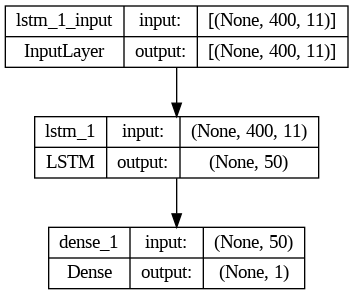

In [27]:
from keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
# Define the file path where you want to save the model
model_path = "/content/drive/MyDrive/codes-backup/lstm-engines/model.h5"

# Save the model
model.save(model_path)

# Print confirmation message
print("Model saved successfully at:", model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: /content/drive/MyDrive/codes-backup/lstm-engines/model.h5


In [18]:
## augmentation of data

import os
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter

# Function to load and preprocess data from a folder
def load_data_from_folder(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_excel(filepath)
        data.append(df.values)
    return np.array(data)

# Function to add noise to the data
def add_noise(data, noise_level=0.05):
    noisy_data = data + noise_level * np.random.randn(*data.shape)
    return noisy_data

# Define folder paths
stable_folder = "/content/drive/MyDrive/codes-backup/lstm-engines/stable"
unstable_folder = "/content/drive/MyDrive/codes-backup/lstm-engines/unstable"

# Loop through stable folder
for filename in os.listdir(stable_folder):
    filepath = os.path.join(stable_folder, filename)
    df = pd.read_excel(filepath)
    augmented_data = add_noise(df.values)
    for i in range(10):
        new_filename = f"augmented_stable_{i}_{filename}"
        new_filepath = os.path.join(stable_folder, new_filename)
        pd.DataFrame(augmented_data).to_excel(new_filepath, index=False)

# Loop through unstable folder
for filename in os.listdir(unstable_folder):
    filepath = os.path.join(unstable_folder, filename)
    df = pd.read_excel(filepath)
    augmented_data = add_noise(df.values)
    for i in range(10):
        new_filename = f"augmented_unstable_{i}_{filename}"
        new_filepath = os.path.join(unstable_folder, new_filename)
        pd.DataFrame(augmented_data).to_excel(new_filepath, index=False)

print("Data augmentation completed successfully.")


Data augmentation completed successfully.
